In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
#os.mkdir('Dataset')

In [3]:
width = 300
height = 200

(-0.5, 471.5, 471.5, -0.5)

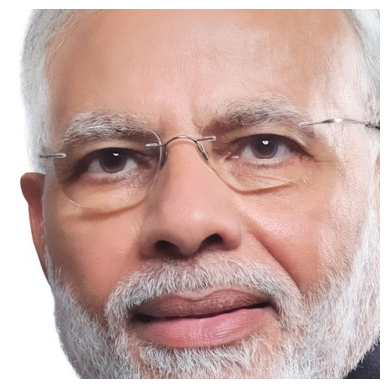

In [9]:
 def crop_face(img, color = 'rgb'):
    '''
    Input   : An image and color (rgb, gray)
    Return  : Image with bounding boxes around faces
    '''
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                  # Convert to rgb
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)            # Create a grayscale version of image
    
    # Create a cascade classifier and use detect multiscale function
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
    
    # Draw the bounding boxes
    for x,y,w,h in faces:
        if color == 'rgb':
            face = img[y : y+h, x : x + w]
        elif color == 'gray':
            face = img_gray[y : y+h, x : x + w]
        else:
            print('Incorrect input for color')
            return
    
    return face
# Testing the function
img = cv2.imread('modi.jpg')
image = crop_face(img, 'rgb')
plt.imshow(image, 'gray')
plt.axis('off')

In [10]:
path = 'Dataset'
count = 1
while count < 5:
    webcam = cv2.VideoCapture(0)
    (_, img) = webcam.read()
    
    face = crop_face(img, 'rgb')
    
    cv2.imwrite('{}/face{}.jpg'.format(path, count), face)
    if count % 4 == 0:
        print('Catured and stored {} images succesfully'.format(count))
      
    count += 1
    
cv2.destroyAllWindows()


In [11]:
webcam.release()